# **Import Neccessary Libraries**

In [1]:
pip install pyspark_dist_explore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 46.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=1a0acddb0189a9c6c1c1fa3796105387aa1620a6ad342a7bf10f0fbf3de0f502
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [6]:
pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from datetime import datetime, date
import pandas as pd
import pyspark
from pyspark.sql import Row
import findspark
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SQLContext
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

# **Upload CSV File**

In [8]:
#Load CSV File of Data into the Google Colab Environment
#Dataset Contains Data Points on Churn Rate for Bank Customers
from google.colab import files
upload = files.upload()

Saving coin_Ethereum.csv to coin_Ethereum.csv


# **Start Spark Session and Find Spark Session**

In [9]:
#Start spark session and find spark session
findspark.init()
spark = SparkSession.builder.getOrCreate()

# **Create Spark Dataframe from CSV**

In [10]:
#Define dataframe with CSV
df_pyspark = spark.read.csv("coin_Ethereum.csv")

In [11]:
#Show dataframe structure
df_pyspark

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string]

In [12]:
#Show top 5 rows
df_pyspark.show(5)

+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+-------------+
|_c0|     _c1|   _c2|                _c3|               _c4|               _c5|               _c6|               _c7|      _c8|          _c9|
+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+-------------+
|SNo|    Name|Symbol|               Date|              High|               Low|              Open|             Close|   Volume|    Marketcap|
|  1|Ethereum|   ETH|2015-08-08 23:59:59|2.7988100051879883|0.7147250175476074| 2.793760061264038|0.7533249855041504| 674188.0|45486894.2408|
|  2|Ethereum|   ETH|2015-08-09 23:59:59|0.8798099756240845| 0.629190981388092|0.7061359882354736|0.7018970251083374| 532170.0|42399573.4991|
|  3|Ethereum|   ETH|2015-08-10 23:59:59|0.7298539876937866|0.6365460157394409|0.7139890193939209|0.7084479928016663| 405283.0|42818364.3945|
|  4|E

In [13]:
#Show table for df
df_pyspark.show()

+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+-------------+
|_c0|     _c1|   _c2|                _c3|               _c4|               _c5|               _c6|               _c7|      _c8|          _c9|
+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+-------------+
|SNo|    Name|Symbol|               Date|              High|               Low|              Open|             Close|   Volume|    Marketcap|
|  1|Ethereum|   ETH|2015-08-08 23:59:59|2.7988100051879883|0.7147250175476074| 2.793760061264038|0.7533249855041504| 674188.0|45486894.2408|
|  2|Ethereum|   ETH|2015-08-09 23:59:59|0.8798099756240845| 0.629190981388092|0.7061359882354736|0.7018970251083374| 532170.0|42399573.4991|
|  3|Ethereum|   ETH|2015-08-10 23:59:59|0.7298539876937866|0.6365460157394409|0.7139890193939209|0.7084479928016663| 405283.0|42818364.3945|
|  4|E

In [14]:
#Show schema
df_pyspark.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)



# **Re-Ingest Dataset with Schema**

In [16]:
#Reingest data w/ schema applied
df_pyspark = spark.read.csv("coin_Ethereum.csv", header = True, inferSchema = True)

In [17]:
#Show top 5 rows with schema applied
df_pyspark.show(5)

+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+---------------+
|SNo|    Name|Symbol|               Date|              High|               Low|              Open|             Close|   Volume|      Marketcap|
+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+---------------+
|  1|Ethereum|   ETH|2015-08-08 23:59:59|2.7988100051879883|0.7147250175476074| 2.793760061264038|0.7533249855041504| 674188.0|4.54868942408E7|
|  2|Ethereum|   ETH|2015-08-09 23:59:59|0.8798099756240845| 0.629190981388092|0.7061359882354736|0.7018970251083374| 532170.0|4.23995734991E7|
|  3|Ethereum|   ETH|2015-08-10 23:59:59|0.7298539876937866|0.6365460157394409|0.7139890193939209|0.7084479928016663| 405283.0|4.28183643945E7|
|  4|Ethereum|   ETH|2015-08-11 23:59:59| 1.131410002708435|0.6632350087165833|0.7080870270729065|1.0678600072860718|1463100.0|6.4569288

In [18]:
#Print data types
df_pyspark.printSchema()

root
 |-- SNo: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Symbol: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Marketcap: double (nullable = true)



In [19]:
#Check the type of data object for dataframe
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [20]:
#Print coumns for the dataframe
df_pyspark.columns

['SNo',
 'Name',
 'Symbol',
 'Date',
 'High',
 'Low',
 'Open',
 'Close',
 'Volume',
 'Marketcap']

In [21]:
#Print head of dataframe
df_pyspark.head(3)

[Row(SNo=1, Name='Ethereum', Symbol='ETH', Date=datetime.datetime(2015, 8, 8, 23, 59, 59), High=2.7988100051879883, Low=0.7147250175476074, Open=2.793760061264038, Close=0.7533249855041504, Volume=674188.0, Marketcap=45486894.2408),
 Row(SNo=2, Name='Ethereum', Symbol='ETH', Date=datetime.datetime(2015, 8, 9, 23, 59, 59), High=0.8798099756240845, Low=0.629190981388092, Open=0.7061359882354736, Close=0.7018970251083374, Volume=532170.0, Marketcap=42399573.4991),
 Row(SNo=3, Name='Ethereum', Symbol='ETH', Date=datetime.datetime(2015, 8, 10, 23, 59, 59), High=0.7298539876937866, Low=0.6365460157394409, Open=0.7139890193939209, Close=0.7084479928016663, Volume=405283.0, Marketcap=42818364.3945)]

# **EDA**

In [22]:
#Select Volume for the first 10 entries in the dataframe
df_pyspark.select("Volume").show(10)

+---------+
|   Volume|
+---------+
| 674188.0|
| 532170.0|
| 405283.0|
|1463100.0|
|2150620.0|
|4068680.0|
|4637030.0|
|2554360.0|
|3550790.0|
|1942830.0|
+---------+
only showing top 10 rows



In [23]:
#Select Volume and Marketcap for the first 10 entries in the dataframe
df_pyspark.select(["Volume", "Marketcap"]).show(10)

+---------+---------------+
|   Volume|      Marketcap|
+---------+---------------+
| 674188.0|4.54868942408E7|
| 532170.0|4.23995734991E7|
| 405283.0|4.28183643945E7|
|1463100.0|6.45692884328E7|
|2150620.0|7.36450109863E7|
|4068680.0|1.10607191674E8|
|4637030.0|1.10672321811E8|
|2554360.0|1.02303608467E8|
|3550790.0|9.49010053503E7|
|1942830.0|8.72953665007E7|
+---------+---------------+
only showing top 10 rows



In [24]:
#Summary statistics for dataframe
df_pyspark.describe().show()

+-------+-----------------+--------+------+-------------------+------------------+------------------+------------------+--------------------+--------------------+
|summary|              SNo|    Name|Symbol|               High|               Low|              Open|             Close|              Volume|           Marketcap|
+-------+-----------------+--------+------+-------------------+------------------+------------------+------------------+--------------------+--------------------+
|  count|             2160|    2160|  2160|               2160|              2160|              2160|              2160|                2160|                2160|
|   mean|           1080.5|    null|  null| 398.25856811495885|365.59258875162004|382.87989906955437| 383.9106913193636|  7.05705789687946E9|4.172084004040071E10|
| stddev|623.6826115902222|    null|  null|  628.0822814796489| 566.6115226638859| 599.7198620970062| 601.0787663056844|1.064525910524058E10|6.909183702982211E10|
|    min|             

In [25]:
#Remove entries with missing values
df_pyspark.na.drop().show()

+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+---------------+
|SNo|    Name|Symbol|               Date|              High|               Low|              Open|             Close|   Volume|      Marketcap|
+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+---------------+
|  1|Ethereum|   ETH|2015-08-08 23:59:59|2.7988100051879883|0.7147250175476074| 2.793760061264038|0.7533249855041504| 674188.0|4.54868942408E7|
|  2|Ethereum|   ETH|2015-08-09 23:59:59|0.8798099756240845| 0.629190981388092|0.7061359882354736|0.7018970251083374| 532170.0|4.23995734991E7|
|  3|Ethereum|   ETH|2015-08-10 23:59:59|0.7298539876937866|0.6365460157394409|0.7139890193939209|0.7084479928016663| 405283.0|4.28183643945E7|
|  4|Ethereum|   ETH|2015-08-11 23:59:59| 1.131410002708435|0.6632350087165833|0.7080870270729065|1.0678600072860718|1463100.0|6.4569288

In [28]:
#Create filtered dataframe for Marketcap
df_pyspark_mrkt = df_pyspark.filter("Marketcap > 4.54868942408E7").show(5)

+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+---------------+
|SNo|    Name|Symbol|               Date|              High|               Low|              Open|             Close|   Volume|      Marketcap|
+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+---------------+
|  4|Ethereum|   ETH|2015-08-11 23:59:59| 1.131410002708435|0.6632350087165833|0.7080870270729065|1.0678600072860718|1463100.0|6.45692884328E7|
|  5|Ethereum|   ETH|2015-08-12 23:59:59|1.2899399995803833|0.8836079835891724| 1.058750033378601|1.2174400091171265|2150620.0|7.36450109863E7|
|  6|Ethereum|   ETH|2015-08-13 23:59:59|1.9650700092315674|1.1719900369644165|1.2222399711608887|1.8276699781417847|4068680.0|1.10607191674E8|
|  7|Ethereum|   ETH|2015-08-14 23:59:59|2.2618799209594727|1.7547500133514404| 1.810920000076294|1.8278700113296509|4637030.0|1.1067232

In [31]:
#Count entries by Volume
df_pyspark.groupBy("Volume").count().show()

+--------------------+-----+
|              Volume|count|
+--------------------+-----+
|  6.23718530934415E9|    1|
| 1.36042685843639E10|    1|
|  6.94637258952751E9|    1|
| 1.04577776516621E10|    1|
|1.577284648471008...|    1|
|4.469991418832903E10|    1|
|           2.54414E7|    1|
|           1.59878E7|    1|
|       6.502859776E9|    1|
|  7.43090451509457E9|    1|
| 1.51237213859445E10|    1|
| 1.86701945948337E10|    1|
|            249891.0|    1|
|            652857.0|    1|
|       1.478390016E9|    1|
|        2.87787008E9|    1|
|       1.808269952E9|    1|
|           2.01608E9|    1|
|   5.069636871774E10|    1|
| 1.03628468984375E10|    1|
+--------------------+-----+
only showing top 20 rows



In [34]:
#Group df entries by Marketcap
df_pyspark.groupBy("Marketcap").sum().show()

+-------------------+--------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|          Marketcap|sum(SNo)|         sum(High)|          sum(Low)|         sum(Open)|        sum(Close)|        sum(Volume)|     sum(Marketcap)|
+-------------------+--------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|    9.61613933897E8|     318|  12.4483003616333|10.524700164794922|12.236900329589844|11.839500427246094|          5.81436E7|    9.61613933897E8|
|3.39257129998582E10|    1418|     318.126310017|       307.6431542|     310.678630878|     318.126310017| 9.64176496518966E9|3.39257129998582E10|
|1.89338826404166E10|    1536|     177.741727183|     173.287744022|     175.524753686|     174.920987616| 6.81582062739651E9|1.89338826404166E10|
| 1.8709615890943E10|    1634|     172.922913631|     166.901097609|     168.008857304|     170.930890433|1.1004476145

In [35]:
#Calcuated sum of Volume
df_pyspark.agg({"Volume": "sum"}).show()

+--------------------+
|         sum(Volume)|
+--------------------+
|1.524324505725963...|
+--------------------+



In [36]:
#Calcuated mean of estimated salaries
df_pyspark.agg({"Marketcap": "mean"}).show()

+--------------------+
|      avg(Marketcap)|
+--------------------+
|4.172084004040071E10|
+--------------------+



In [37]:
#Creating Table
df_pyspark.registerTempTable('EthTrade')
sqlContext = SQLContext(spark)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [38]:
#Create filtered dataframe for bank customers 21 or younger
#Targets college age subset of bank customers
df_pyspark_21_younger = df_pyspark.filter("Marketcap > 4.54868942408E7").show()

+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+---------------+
|SNo|    Name|Symbol|               Date|              High|               Low|              Open|             Close|   Volume|      Marketcap|
+---+--------+------+-------------------+------------------+------------------+------------------+------------------+---------+---------------+
|  4|Ethereum|   ETH|2015-08-11 23:59:59| 1.131410002708435|0.6632350087165833|0.7080870270729065|1.0678600072860718|1463100.0|6.45692884328E7|
|  5|Ethereum|   ETH|2015-08-12 23:59:59|1.2899399995803833|0.8836079835891724| 1.058750033378601|1.2174400091171265|2150620.0|7.36450109863E7|
|  6|Ethereum|   ETH|2015-08-13 23:59:59|1.9650700092315674|1.1719900369644165|1.2222399711608887|1.8276699781417847|4068680.0|1.10607191674E8|
|  7|Ethereum|   ETH|2015-08-14 23:59:59|2.2618799209594727|1.7547500133514404| 1.810920000076294|1.8278700113296509|4637030.0|1.1067232

In [40]:
#Running Query for High Marketcap
df_pyspark_High_Marketcap = sqlContext.sql("SELECT Marketcap from EthTrade where Marketcap > 4.54868942408E7").toPandas()

In [41]:
df_pyspark_High_Marketcap

,Marketcap
0,6.456929e+07
1,7.364501e+07
2,1.106072e+08
3,1.106723e+08
4,1.023036e+08
...,...
2138,2.505527e+11
2139,2.594475e+11
2140,2.706217e+11
2141,2.562978e+11


# **Data Viz**

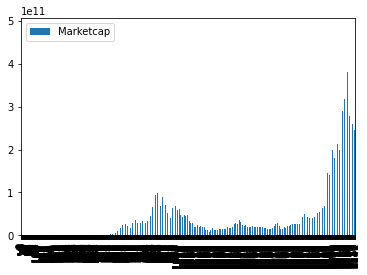

In [44]:
df_pyspark_High_Marketcap.plot.bar()  

(array([1237.,  493.,  150.,   69.,   22.,   23.,   14.,   16.,   35.,
          17.,   22.,   20.,   13.,   11.,    2.,    2.,    5.,    3.,
           4.,    2.]),
 array([3.22136262e+07, 2.41746980e+10, 4.83171823e+10, 7.24596667e+10,
        9.66021510e+10, 1.20744635e+11, 1.44887120e+11, 1.69029604e+11,
        1.93172088e+11, 2.17314573e+11, 2.41457057e+11, 2.65599541e+11,
        2.89742026e+11, 3.13884510e+11, 3.38026994e+11, 3.62169479e+11,
        3.86311963e+11, 4.10454447e+11, 4.34596932e+11, 4.58739416e+11,
        4.82881900e+11]),
 <a list of 20 Patch objects>)

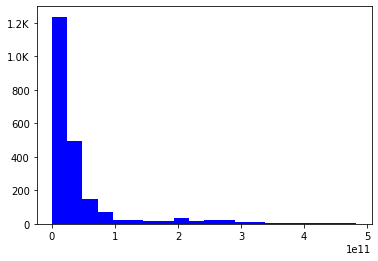

In [45]:
#Distribution of Age of Bank Customers
fig, ax = plt.subplots()
hist(ax, df_pyspark.select('Marketcap'), bins = 20, color=['blue'])

(array([1.271e+03, 2.890e+02, 1.950e+02, 1.260e+02, 6.800e+01, 6.000e+01,
        4.100e+01, 3.100e+01, 2.000e+01, 1.800e+01, 1.300e+01, 1.000e+01,
        8.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([1.02128000e+05, 4.22424266e+09, 8.44838319e+09, 1.26725237e+10,
        1.68966643e+10, 2.11208048e+10, 2.53449453e+10, 2.95690859e+10,
        3.37932264e+10, 3.80173669e+10, 4.22415075e+10, 4.64656480e+10,
        5.06897885e+10, 5.49139290e+10, 5.91380696e+10, 6.33622101e+10,
        6.75863506e+10, 7.18104912e+10, 7.60346317e+10, 8.02587722e+10,
        8.44829128e+10]),
 <a list of 20 Patch objects>)

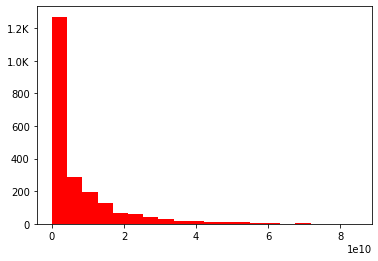

In [46]:
#Distribution of Estimated Salaries of Bank Customers
fig, ax = plt.subplots()
hist(ax, df_pyspark.select('Volume'), bins = 20, color=['red'])